## Simulating at higher temperatures and setting $Q_{10}$ values

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 2000)
pd.set_option("display.float_format", "{:,.4f}".format)

In [7]:
from pyloric import create_prior, simulate, stats
from pyloric.utils import show_traces
import torch

### Create prior with default $Q_{10}$ values

In [8]:
# customization = {"Q10_tau_m": True}
prior = create_prior(customization={})
_ = torch.manual_seed(0)
p = prior.sample((1,))
p

AB/PD                                                      LP                                                      PY                                                  Synapses                                                    
      Na    CaT    CaS      A    KCa     Kd      H   Leak     Na    CaT    CaS      A    KCa     Kd      H   Leak     Na    CaT    CaS      A    KCa     Kd      H   Leak    AB-LP    PD-LP    AB-PY    PD-PY   LP-PD    LP-PY   PY-LP
0 0.3046 0.0033 0.0023 0.0347 0.0061 0.0778 0.0000 0.0000 0.0730 0.0005 0.0041 0.0118 0.0022 0.0488 0.0000 0.0000 0.1535 0.0016 0.0017 0.0336 0.0007 0.0739 0.0000 0.0000 -15.2981 -11.9937 -11.6565 -10.5695 -9.8392 -15.7997 -9.0965

### Simulate at 10 degree and at 26 degree

In [9]:
simulation_output = [simulate(p.loc[0], temperature=temp, seed=0, defaults={"Q10_tau_m": 2.8, "Q10_tau_h": 1.7}) for temp in [300]]

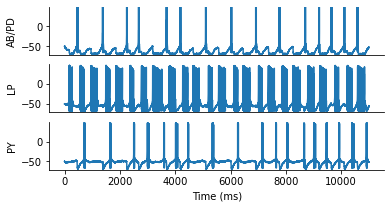

In [10]:
for sim_ in simulation_output:
    _ = show_traces(sim_)

### Using variable $Q_{10}$ values

In [31]:
_ = torch.manual_seed(0)

In [32]:
customization = {
    "Q10_gbar_mem": [True, True, True, True, True, True, True, True],
    "Q10_gbar_syn": [True, True]
}

prior = create_prior(customization=customization)
p = prior.sample((1,))
p

AB/PD                                                      LP                                                      PY                                                  Synapses                                                     Q10 gbar                                                               
      Na    CaT    CaS      A    KCa     Kd      H   Leak     Na    CaT    CaS      A    KCa     Kd      H   Leak     Na    CaT    CaS      A    KCa     Kd      H   Leak    AB-LP    PD-LP    AB-PY    PD-PY   LP-PD    LP-PY   PY-LP       Na    CaT    CaS      A    KCa     Kd      H   Leak   Glut   Chol
0 0.3046 0.0033 0.0023 0.0347 0.0061 0.0778 0.0000 0.0000 0.0730 0.0005 0.0041 0.0118 0.0022 0.0488 0.0000 0.0000 0.1535 0.0016 0.0017 0.0336 0.0007 0.0739 0.0000 0.0000 -15.2981 -11.9937 -11.6565 -10.5695 -9.8392 -15.7997 -9.0965   1.6306 1.1959 1.1527 1.4815 1.9175 1.5720 1.4808 1.7961 1.3680 1.2722

### Simulate them at 10 and 26 degree
The trace at 10 degree is identical because it is the reference temperature at which $Q_{10}$ values do not play a role. The activity is slightly different at 26 degree though.

In [218]:
simulation_output = [simulate(p.loc[0], temperature=temp, customization=customization, seed=0) for temp in [283]]

IndexError: index 14 is out of bounds for axis 0 with size 14

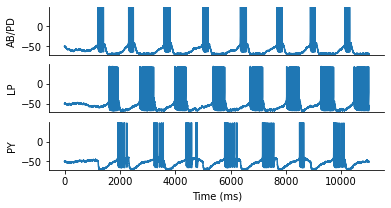

In [219]:
for sim_ in simulation_output:
    _ = show_traces(sim_)